In [ ]:
!pip3 install numpy pandas matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_charts(file: str, modo: str, modo_full_name: str):
    df = pd.read_csv(file)
    
    df_chart = df[df['Modo de Controle'] == modo]
    x_ = df_chart['Hora'].values
    ticks = [i for i in range(0, len(x_), len(x_)//10)]
    
    df_chart1 = df_chart.drop(columns=['Data', 'Acionamento %','Modo de Controle']) 
    chart1 = df_chart1.plot(x="Hora", y=["Temperatura Ambiente", "Temperatura Interna", "Temperatura Referencia"],
               kind='line', title=f"Tempo x Temperatura ({modo_full_name})", grid=True, ylim=(20, 70), figsize=(15, 7),
               legend=True, xlabel="Tempo(hh:mm:ss)", ylabel="Temperatura(°C)", fontsize=10, xticks=ticks)
    
    df_chart2 = df_chart.drop(columns=['Data', 'Temperatura Ambiente', 'Temperatura Interna', 'Temperatura Referencia', 'Modo de Controle'])
    chart2 = df_chart2.plot(x="Hora",
               kind='line', title=f"Tempo x Acionamento ({modo_full_name})", grid=True, ylim=(-120, 120), figsize=(15, 7),
               legend=True, xlabel="Tempo(hh:mm:ss)", ylabel="Acionamento(%)", fontsize=10, xticks=ticks)
    
    return chart1, chart2

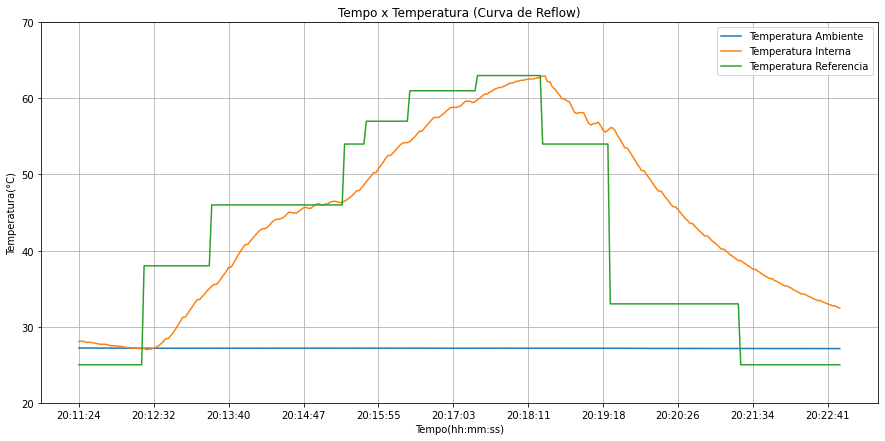

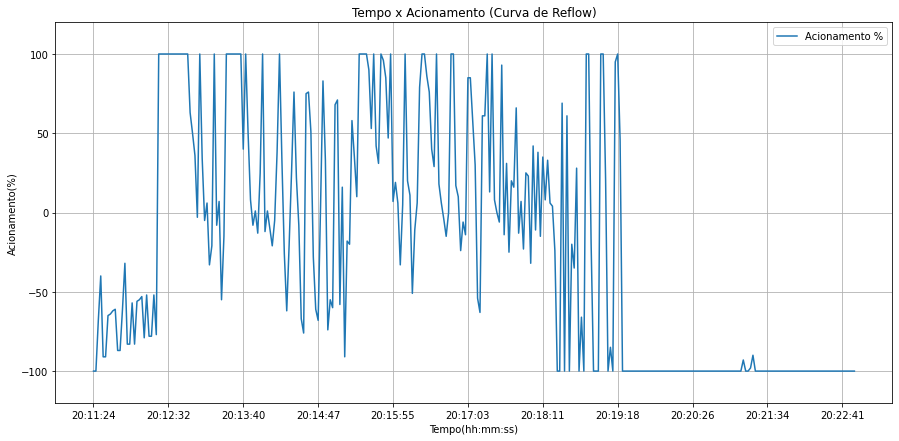

In [3]:
curve_chart1, curve_chart2 = get_charts('log_exp_curva.csv', 'CUR', 'Curva de Reflow')

In [4]:
curve_chart1_fig = curve_chart1.get_figure()
curve_chart1_fig.savefig("curva_temperatura.jpg")
curve_chart2_fig = curve_chart2.get_figure()
curve_chart2_fig.savefig("curva_acionamento.jpg")

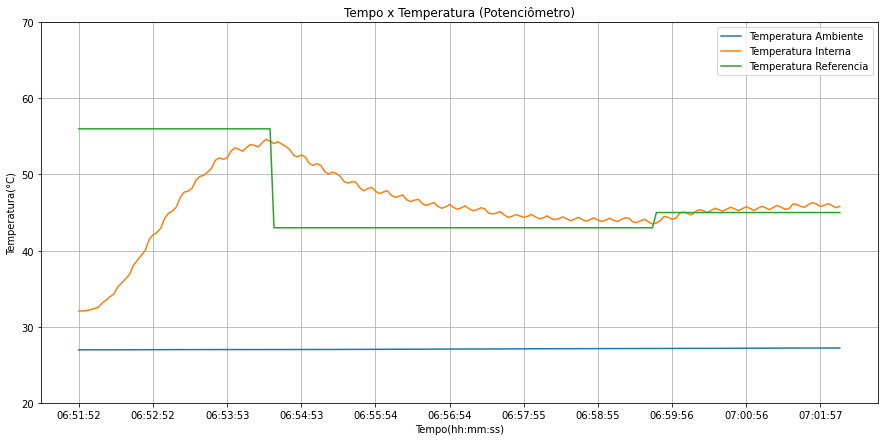

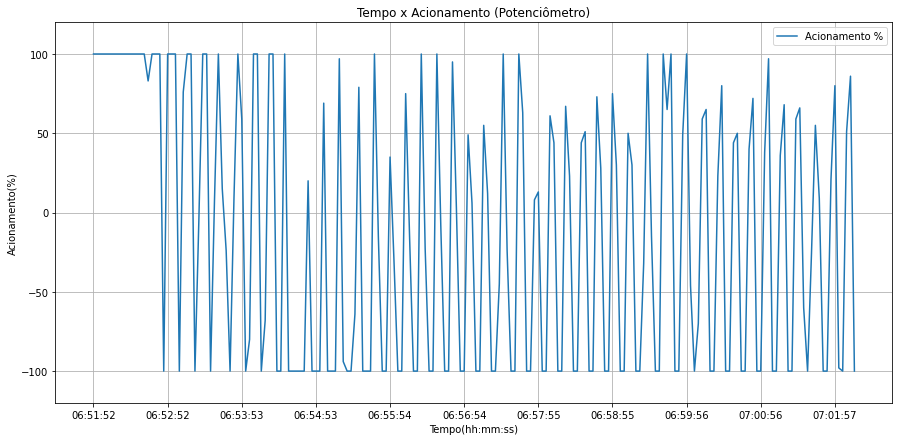

In [5]:
potentiometer_chart1, potentiometer_chart2 = get_charts("log_exp_potenciometro.csv", "POT", "Potenciômetro")

In [6]:
potentiometer_chart1_fig = potentiometer_chart1.get_figure()
potentiometer_chart1_fig.savefig("potenciometro_temperatura.jpg")
potentiometer_chart2_fig = potentiometer_chart2.get_figure()
potentiometer_chart2_fig.savefig("potenciometro_acionamento.jpg")